In [1]:
import tifffile
import numpy
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [2]:
tifffile.__version__

'2021.8.30'

In [3]:
data_dir = "/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/"

In [4]:
ch1 = sorted(list(Path(data_dir).glob("*Ch1.*.tif*")))
ch4 = sorted(list(Path(data_dir).glob("*Ch4.*.tif*")))
ch6 = sorted(list(Path(data_dir).glob("*Ch6.*.tif*")))
ch7 = sorted(list(Path(data_dir).glob("*Ch7.*.tif*")))
ch11 = sorted(list(Path(data_dir).glob("*Ch11.*.tif*")))

In [5]:
data = [tifffile.imread([str(t) for t in p]) for p in zip(ch1, ch4, ch6, ch7, ch11)]

TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER


In [31]:
[str(c) for c in ch1].index('/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/1000_Ch1.ome.tif')

0

In [6]:
mins = numpy.array([numpy.min(d.reshape(d.shape[0], -1), axis=1) for d in data])
mins = mins.min(axis=0)
mins

array([290,   0,   0,  28,   0], dtype=uint16)

In [7]:
sum(d[1].size for d in data)

236591

In [8]:
l = list(filter(lambda d: numpy.nonzero(d[1] > 2**12)[0].size, enumerate(data)))

In [9]:
sum([numpy.nonzero(d > 4096)[0].size for d in data])

8126

In [10]:
indices = [l_[0] for l_ in l]

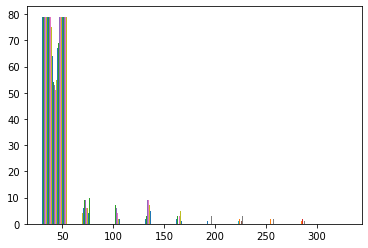

In [11]:
_ = plt.hist(numpy.clip(data[49][1], 0, 4096))

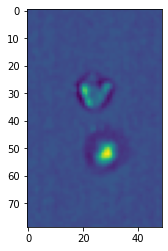

In [12]:
plt.imshow(data[49][0])

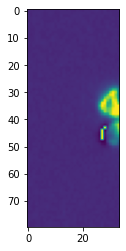

In [13]:
plt.imshow(numpy.clip(data[0][1], 0, 250))

In [14]:
maxs = numpy.array([numpy.max(d.reshape(d.shape[0], -1), axis=1) for d in data])
maxs = maxs.max(axis=0)
maxs

array([ 1166, 65535, 65535,  4082, 65535], dtype=uint16)

In [15]:
data_norm = [(d - mins[..., numpy.newaxis, numpy.newaxis]) / (maxs - mins)[..., numpy.newaxis, numpy.newaxis] for d in data]

In [16]:
data_norm[1][0].max()

0.7682648401826484

In [17]:
data_norm[1][0].min()

0.4794520547945205

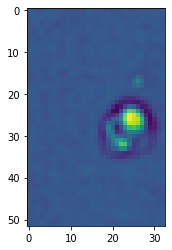

In [18]:
plt.imshow(data_norm[1][0])

In [19]:
import pickle

In [20]:
with open("../tmp/quantiles.dat", "rb") as fh:
    quantiles = pickle.load(fh)

In [21]:
quantiles[0][1]

array([[ 290., 1095.],
       [   0., 4096.],
       [   0., 4096.],
       [  95., 4082.],
       [   0., 4096.]])

In [35]:
i0 = (data[0][0] - quantiles[0][1][0][0]) / (quantiles[0][1][0][1] - quantiles[0][1][0][0])

In [36]:
i0.min(axis=None)

0.5130434782608696